# Adding Nodes into Specific Contexts in ASTx

## Introduction

In abstract syntax tree (AST) manipulations, context or scope management is crucial for correctly placing nodes within the tree. This tutorial will discuss two methods to add nodes into specific contexts or scopes using the `ASTx` library, which provides a comprehensive framework for constructing and manipulating ASTs.

## Setup

Before you begin, make sure you have the `ASTx` library installed and imported in your Python environment:

In [1]:
import astx

## Example Setup

We will explore two methods for adding nodes into specific contexts, 1) with `append` method into the parent object, and 2) with the `parent` attribute.

## Method 1: Using the `parent` Attribute

One effective way to manage context is by directly adding new child nodes into the parent one. This method doesn't require the creation of the `parent` node first:

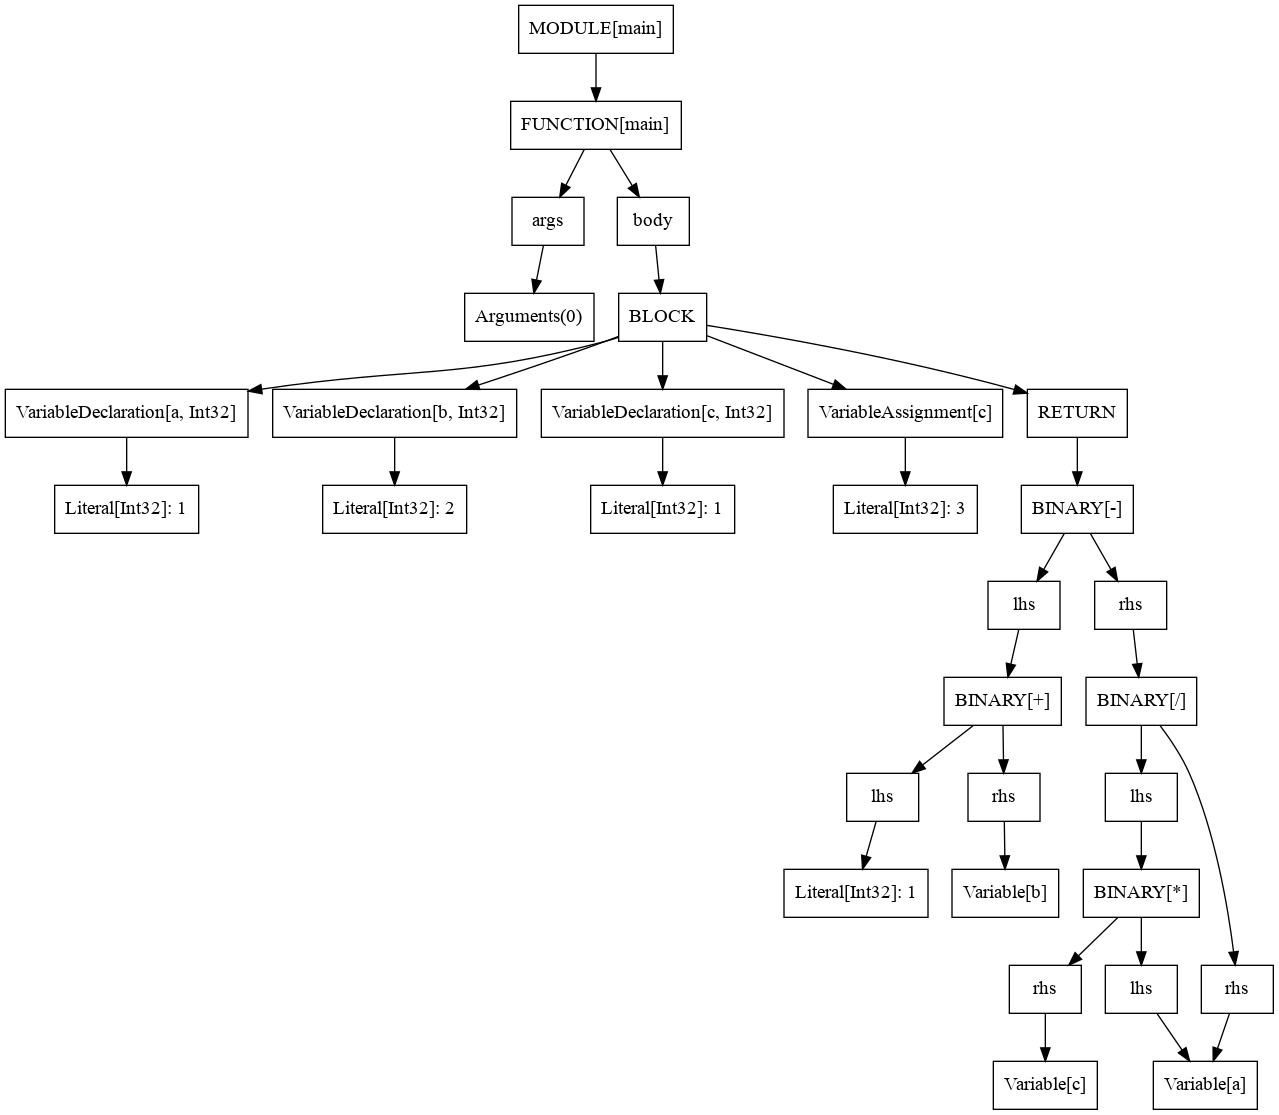

In [2]:
# Initialize the ASTx module
module = astx.Module()

# Declare variables 'a', 'b', and 'c' with initial values
decl_a = astx.VariableDeclaration(name="a", type_=astx.Int32, value=astx.LiteralInt32(1))
decl_b = astx.VariableDeclaration(name="b", type_=astx.Int32, value=astx.LiteralInt32(2))
decl_c = astx.VariableDeclaration(name="c", type_=astx.Int32, value=astx.LiteralInt32(1))

# Reassign a new value to variable 'c'
assign_c = astx.VariableAssignment(name="c", value=astx.LiteralInt32(3))

# Create ASTx Variable objects
a = astx.Variable(name="a")
b = astx.Variable(name="b")
c = astx.Variable(name="c")

# Create a literal integer
lit_1 = astx.LiteralInt32(1)

# Perform basic operations
basic_op = lit_1 + b - a * c / a

# Define the main function prototype
main_proto = astx.FunctionPrototype(
    name="main", args=astx.Arguments(), return_type=astx.Int32
)

# Create a block of code and append variable declarations and operations
main_block = astx.Block()
main_block.append(decl_a)
main_block.append(decl_b)
main_block.append(decl_c)
main_block.append(assign_c)
main_block.append(astx.FunctionReturn(basic_op))

# Define the main function with its body
main_fn = astx.Function(prototype=main_proto, body=main_block)

# Append the main function to the module block
module.block.append(main_fn)
module

## Using `parent` argument

If you prefer to add a new node automatically into the parent node, you can use the `parent` argument, pointing it to the desired parent node:

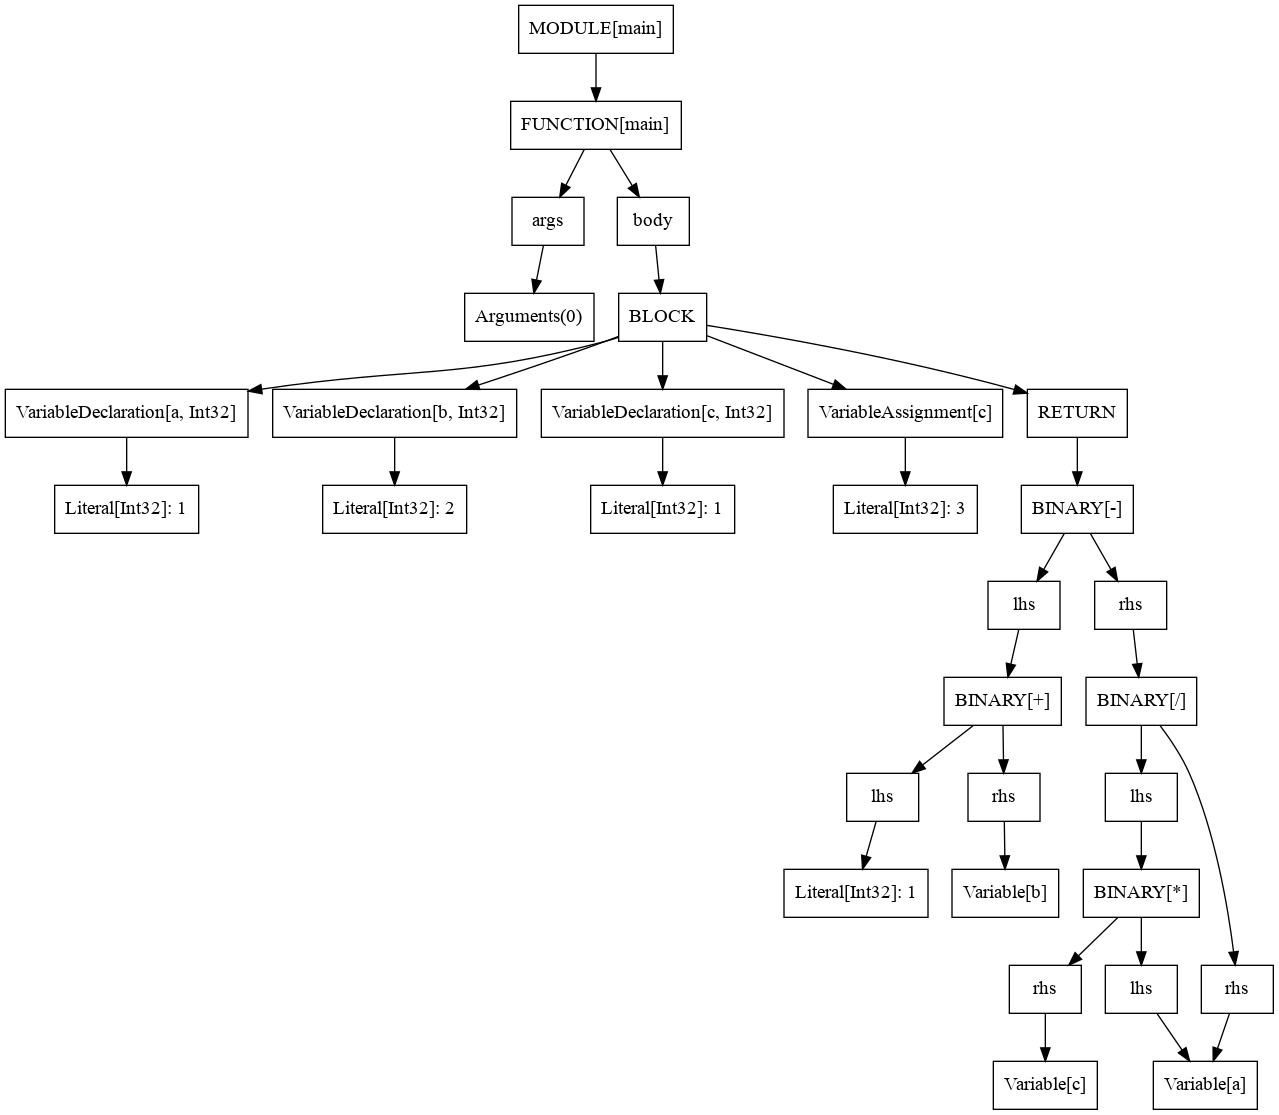

In [3]:
# Initialize the ASTx module
module = astx.Module()

main_block = astx.Block()

# Define the main function prototype
main_proto = astx.FunctionPrototype(
    name="main", args=astx.Arguments(), return_type=astx.Int32
)
# Define the main function with its body
main_fn = astx.Function(prototype=main_proto, body=main_block, parent=module)

# Declare variables 'a', 'b', and 'c' with initial values
decl_a = astx.VariableDeclaration(name="a", type_=astx.Int32, value=astx.LiteralInt32(1), parent=main_block)
decl_b = astx.VariableDeclaration(name="b", type_=astx.Int32, value=astx.LiteralInt32(2), parent=main_block)
decl_c = astx.VariableDeclaration(name="c", type_=astx.Int32, value=astx.LiteralInt32(1), parent=main_block)

# Reassign a new value to variable 'c'
assign_c = astx.VariableAssignment(name="c", value=astx.LiteralInt32(3), parent=main_block)

# Create ASTx Variable objects
a = astx.Variable(name="a")
b = astx.Variable(name="b")
c = astx.Variable(name="c")

# Create a literal integer
lit_1 = astx.LiteralInt32(1)

# Perform basic operations
basic_op = lit_1 + b - a * c / a
astx.FunctionReturn(basic_op, parent=main_block)

module

## Conclusion

In this tutorial, we explored two methods for adding nodes into specific contexts or scopes in ASTs using the `ASTx` library. By correctly managing the context of nodes, developers can ensure that the AST accurately represents the intended structure of the source code, which is essential for further analysis or transformations. Whether you choose to manually add the child node into the parent node or using the `parent` argument, `ASTx` provides the flexibility to suit various coding styles and requirements.